# **Sentimen Analisis Aplikasi Grab di Play Store**

# **IMPORT LIBARY YANG DIBUTUHKAN**

In [1]:
import pandas as pd  # Pandas berfungsi sebagai manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # diperuntukkan sebagai menonaktifkan peringatan chaining
import numpy as np  # NumPy berfungsi sebagai komputasi numerik
seed = 0
np.random.seed(seed)  # sebagai pengaturan seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib berfungsi sebagai visualisasi data
import seaborn as sns  # Seaborn berfungsi sebagai visualisasi data statistik, mengatur gaya visualisasi
import csv #untuk menyimpan ulasan dalam file CSV
from io import StringIO
import requests
import datetime as dt  # untuk manipulasi data waktu dan tanggal
import re  # Modul yang berfungsi pekerjaan dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # untuk tokenisasi teks
from nltk.corpus import stopwords  # untuk daftar kata-kata berhenti dalam teks
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm import tqdm

# Untuk pemodelan machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

#untuk pemodelan Deep Learning
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer





!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # untuk membuat visualisasi berbentuk awan kata (word cloud) dari teks


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [2]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('punkt_tab')
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Loading Dataset**

In [4]:
#Membaca ulasan dalam file csv
df = pd.read_csv("grab_reviews.csv")

In [5]:
app_reviews_df = pd.read_csv("grab_reviews.csv")
app_reviews_df.shape
app_reviews_df.head()

,content,score
0,Sekarang aplikasi grab jelek banget sering ero...,1
1,"Saya sangat kecewa dengan aplikasinya, berapa ...",3
2,aplikasinya lemot banget sihh padahal sinyal u...,1
3,"gak jelas bgt pakai grab express instan, baran...",1
4,kocak bgtt gajelas tolong ya di perbaiki lagi ...,1


In [6]:
# membuat DataFrame
app_reviews_df = pd.read_csv("grab_reviews.csv")

# Menghitung jumlah baris dan kolom dalam DataFrame
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape


In [7]:
# Menampilkan informasi tentang DataFrame
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  12000 non-null  object
 1   score    12000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 187.6+ KB


In [8]:
# Membuat DataFrame baru (clean_df) dengan menghapus baris yang memiliki nilai yang hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [9]:
# Menghapus baris duplikat dari DataFrame (clean_df)
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame (clean_df) setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape

In [10]:
# Menampilkan informasi tentang DataFrame (clean_df) setelah membersihkan nilai yang hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11995 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  11995 non-null  object
 1   score    11995 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 281.1+ KB


# **Preprocessing**

In [11]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy","hah"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

# membuat stemmer & cache
factory = StemmerFactory()
stemmer = factory.create_stemmer()
cache = {}

def stemmingText(text):
    words = text.split()
    stemmed_words = []
    for word in words:
        if word not in cache:
            cache[word] = stemmer.stem(word)
        stemmed_words.append(cache[word])
    return ' '.join(stemmed_words)


In [12]:
slangwords = {
    "@": "di", "abis": "habis", "wtb": "ingin membeli", "masi": "masih",
    "wts": "ingin menjual", "wtt": "ingin menukar", "bgt": "sekali",
    "maks": "maksimal", "plisss": "tolong", "bgttt": "sekali",
    "indo": "indonesia", "bgtt": "sekali", "ad": "ada", "rv": "red velvet",
    "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar di tempat",
    "adlh": "adalah", "afaik": "setahu saya", "ahaha": "haha", "aj": "saja",
    "ak": "saya", "alay": "norak", "anjrit": "anjing", "anter": "antar",
    "apes": "sial", "aq": "saya", "asbun": "asal ngomong", "asekk": "asyik",
    "ato": "atau", "awak": "saya", "ay": "sayang", "ayank": "sayang",
    "b4": "sebelum", "bakalan": "akan", "bgt": "sekali", "blh": "boleh",
    "blm": "belum", "bnyk": "banyak", "btw": "ngomong-ngomong", "bwt": "buat",
    "byk": "banyak", "cepet": "cepat", "cie": "wah", "dgn": "dengan",
    "dlu": "dulu", "dpt": "dapat", "drmn": "darimana", "drtd": "dari tadi",
    "dtg": "datang", "elu": "kamu", "emng": "memang", "gaje": "tidak jelas",
    "gan": "juragan", "gaptek": "gagap teknologi", "gbs": "tidak bisa",
    "gw": "saya", "haha": "tertawa", "hny": "hanya", "hrus": "harus",
    "ilfil": "tidak suka", "imoetz": "imut", "iya": "iya", "jdi": "jadi",
    "jg": "juga", "jgn": "jangan", "kalo": "kalau", "karna": "karena",
    "kayanya": "sepertinya", "km": "kamu", "kmrn": "kemarin", "knp": "kenapa",
    "kpn": "kapan", "krenz": "keren", "kt": "kita", "kyk": "seperti",
    "lah": "lah", "lg": "lagi", "lgsg": "langsung", "liat": "lihat",
    "loe": "kamu", "lum": "belum", "maem": "makan", "malem": "malam",
    "mao": "mau", "mgu": "minggu", "mngkn": "mungkin", "msk": "masuk",
    "msh": "masih", "mulu": "terus-terusan", "musti": "harus", "nanya": "bertanya",
    "napa": "kenapa", "ngapain": "sedang apa", "ngasih": "memberikan",
    "nggak": "tidak", "nih": "ini", "ntar": "nanti", "nyari": "mencari",
    "ogah": "tidak mau", "ok": "oke", "ortu": "orang tua", "otw": "sedang dalam perjalanan",
    "pake": "pakai", "pd": "pada", "pede": "percaya diri", "plg": "paling",
    "prnh": "pernah", "pst": "pasti", "qmu": "kamu", "rame": "ramai",
    "rejeki": "rezeki", "sampe": "sampai", "sgt": "sangat", "shg": "sehingga",
    "sj": "saja", "sklh": "sekolah", "slesai": "selesai", "smw": "semua",
    "sory": "maaf", "sotoy": "sok tahu", "spt": "seperti", "stiap": "setiap",
    "stlh": "setelah", "syg": "sayang", "tau": "tahu", "td": "tadi",
    "tdk": "tidak", "temen": "teman", "tggu": "tunggu", "thn": "tahun",
    "tks": "terima kasih", "tlp": "telepon", "trs": "terus", "ttg": "tentang",
    "u": "kamu", "udah": "sudah", "utk": "untuk", "wkt": "waktu",
    "wkwk": "tertawa", "ya": "iya", "yg": "yang", "yowes": "ya sudah",
    "yup": "iya"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    return ' '.join(fixed_words)


In [13]:

# Membersihkan teks
clean_df['clean_text'] = clean_df['content'].apply(cleaningText)

# Mengubah menjadi huruf kecil
clean_df['lower_text'] = clean_df['clean_text'].apply(casefoldingText)

# Mengganti kata slang dengan kata baku
clean_df['normalized_text'] = clean_df['lower_text'].apply(fix_slangwords)

# Tokenisasi
clean_df['tokens'] = clean_df['normalized_text'].apply(tokenizingText)

# menghapus kata-kata umum dan menyimpan di 'Text_stopwords'
clean_df['no_stopwords'] = clean_df['tokens'].apply(filteringText)

# menggabungkan token menjadi kalimat akhir
clean_df['final_text'] = clean_df['no_stopwords'].apply(toSentence)



# **Pelabelan**

In [14]:

# Membaca kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    next(reader, None)
    for row in reader:
        try:
            lexicon_positive[row[0].strip()] = int(row[1])
        except (IndexError, ValueError):
            continue
else:
    print("Failed to fetch positive lexicon data")

# Membaca kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    next(reader, None)
    for row in reader:
        try:
            lexicon_negative[row[0].strip()] = int(row[1])
        except (IndexError, ValueError):
            continue
else:
    print("Failed to fetch negative lexicon data")

print(f"Jumlah kata positif: {len(lexicon_positive)}")
print(f"Jumlah kata negatif: {len(lexicon_negative)}")


Jumlah kata positif: 3608
Jumlah kata negatif: 6606


In [15]:
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    # else:
    #     polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [16]:
# menghitung sentimen untuk setiap baris
results = clean_df['final_text'].apply(lambda x: sentiment_analysis_lexicon_indonesia(x.split()))

# memisahkan menjadi dua list: skor & polaritas
scores, polarities = zip(*results)

# menambahkan ke DataFrame
clean_df['polarity_score'] = scores
clean_df['polarity'] = polarities


# melihat distribusi label
print(clean_df['polarity'].value_counts())


polarity
negative    6512
positive    5483
Name: count, dtype: int64


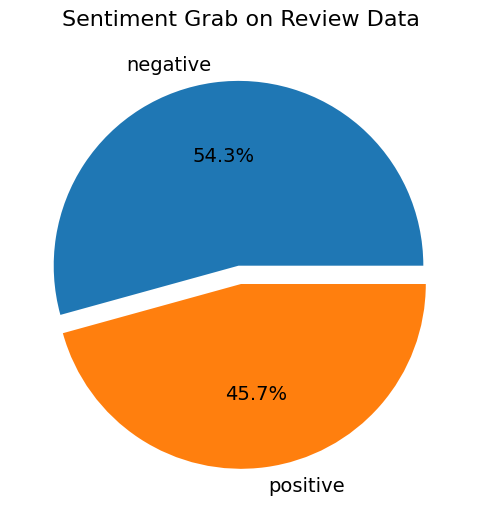

In [17]:

# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Menghitung jumlah data untuk tiap kategori polaritas
polarity_counts = clean_df['polarity'].value_counts()

#  Mengambil jumlah data dan label
sizes = list(polarity_counts.values)
labels = list(polarity_counts.index)

# membuat explode otomatis: potongan untuk 'negative' akan ditarik keluar sedikit
explode = [0.1 if lbl.lower() == 'negative' else 0 for lbl in labels]

# Membuat pie chart
ax.pie(
    x=sizes,
    labels=labels,
    autopct='%1.1f%%',
    explode=explode,
    textprops={'fontsize': 14}
)

# menentukan judul untuk pie chart
ax.set_title('Sentiment Grab on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart
plt.show()


In [18]:
# Menampilkan teks panjang sampai 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# memfilter hanya data dengan polaritas positif
positive_tweets = clean_df[clean_df['polarity'] == 'positive'].copy()

# memilih kolom yang ada (gunakan text_akhir kalau text_stopword tidak ada)
selected_cols = [col for col in ['text_akhir', 'polarity_score', 'polarity', 'text_stopword'] if col in positive_tweets.columns]
positive_tweets = positive_tweets[selected_cols]

# mengurutkan berdasarkan skor tertinggi
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# mereset index agar mulai dari 0 dan menambahkan 1 ke semua index DataFrame
positive_tweets = positive_tweets.reset_index(drop=True)
positive_tweets.index += 1


In [19]:
# mengatur agar kolom dapat menampilkan tesk hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# memfilter ulasan dengan polaritas negatif
negative_tweets = clean_df[clean_df['polarity'] == 'negative'].copy()

# memilih kolom-kolam tertentu dari DataFrame
selected_cols = [col for col in ['text_akhir', 'polarity_score', 'polarity', 'text_stopword'] if col in negative_tweets.columns]
negative_tweets = negative_tweets[selected_cols]

# mengurutkan dari skor paling negatif
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# memilih hanya 10 baris teratas
negative_tweets = negative_tweets.head(10)

# mereset index agar mulai dari 0 dan menambahkan 1 ke semua index DataFrame
negative_tweets = negative_tweets.reset_index(drop=True)
negative_tweets.index += 1



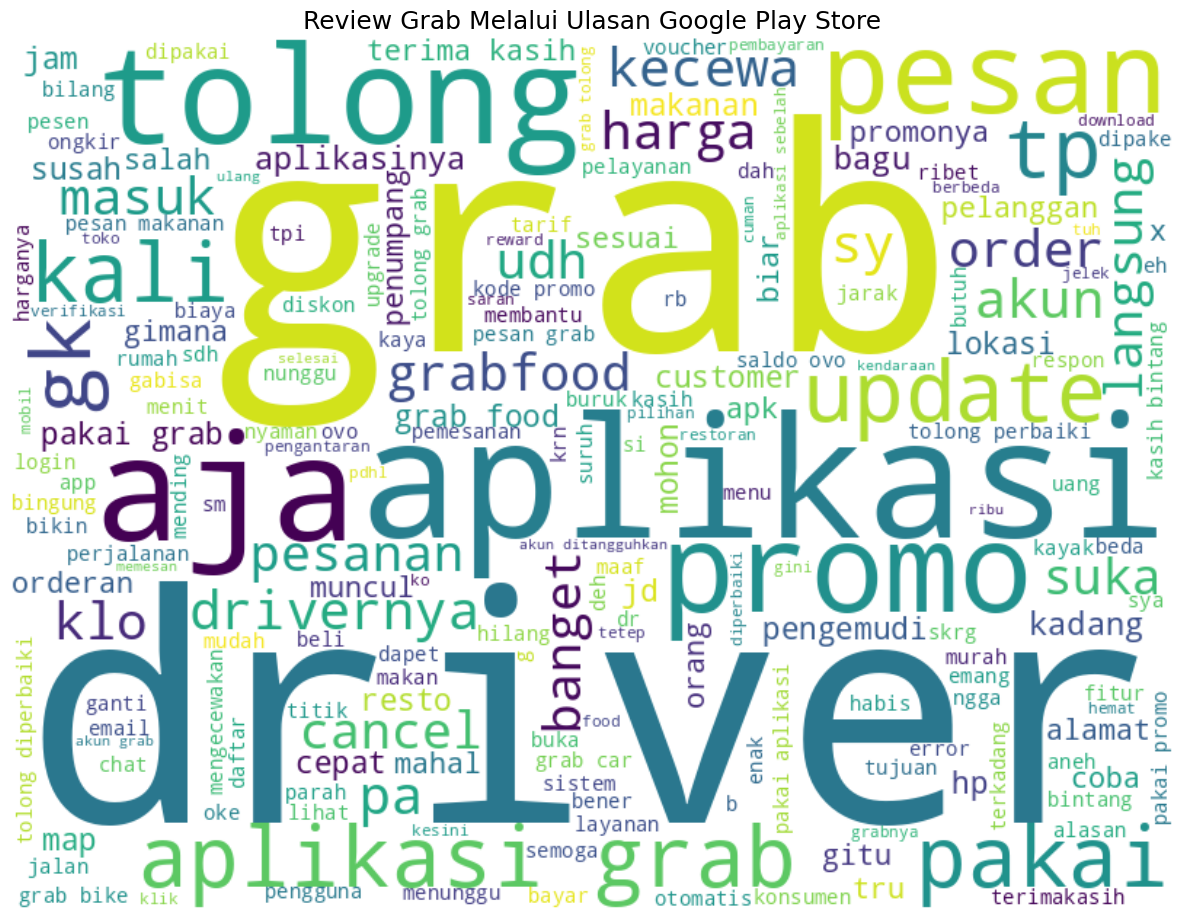

In [20]:
# Mengumpulkan semua kata sekaligus menggunakan list comprehension
all_words = [' '.join(tweet) for tweet in clean_df['no_stopwords'] if isinstance(tweet, list)]
list_words = ' '.join(all_words)

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(
    width=800,
    height=600,
    background_color='white',
    min_font_size=10
).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title('Review Grab Melalui Ulasan Google Play Store', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()


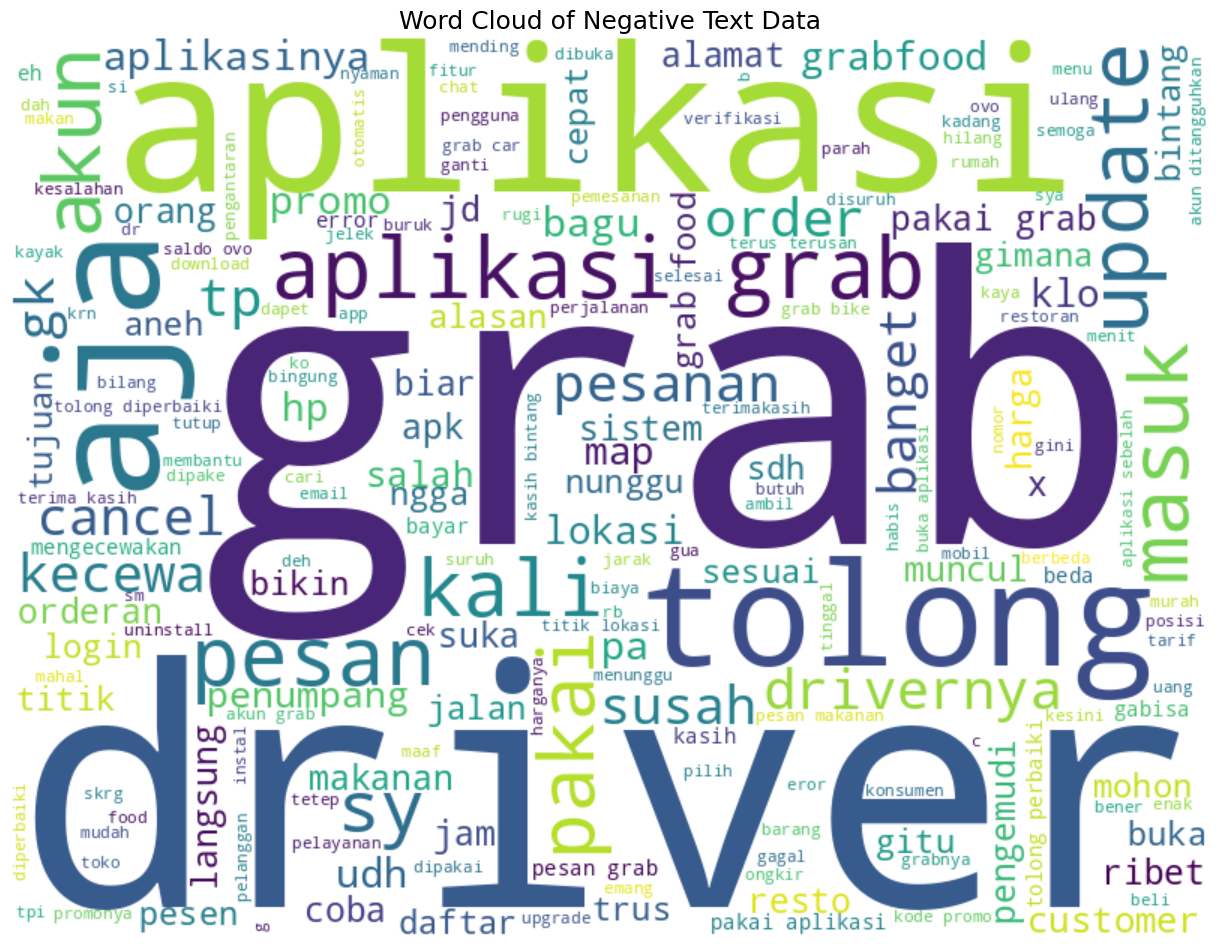

In [24]:

# Filter review negatif
negative_df = clean_df[clean_df['polarity'] == 'negative']

# Ambil token dari kolom no_stopwords
negative_tokens = [tweet for tweet in negative_df['no_stopwords'] if isinstance(tweet, list)]

# Hanya buat wordcloud jika ada kata
if negative_tokens:
    list_words = ' '.join([' '.join(tweet) for tweet in negative_tokens])

    wordcloud = WordCloud(
        width=800,
        height=600,
        background_color='white',
        min_font_size=10
    ).generate(list_words)

    fig, ax = plt.subplots(figsize=(12, 10))
    ax.set_title('Word Cloud of Negative Text Data', fontsize=18)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    fig.tight_layout(pad=0)
    plt.show()
else:
    print("Tidak ada kata yang bisa divisualisasikan untuk ulasan negatif.")


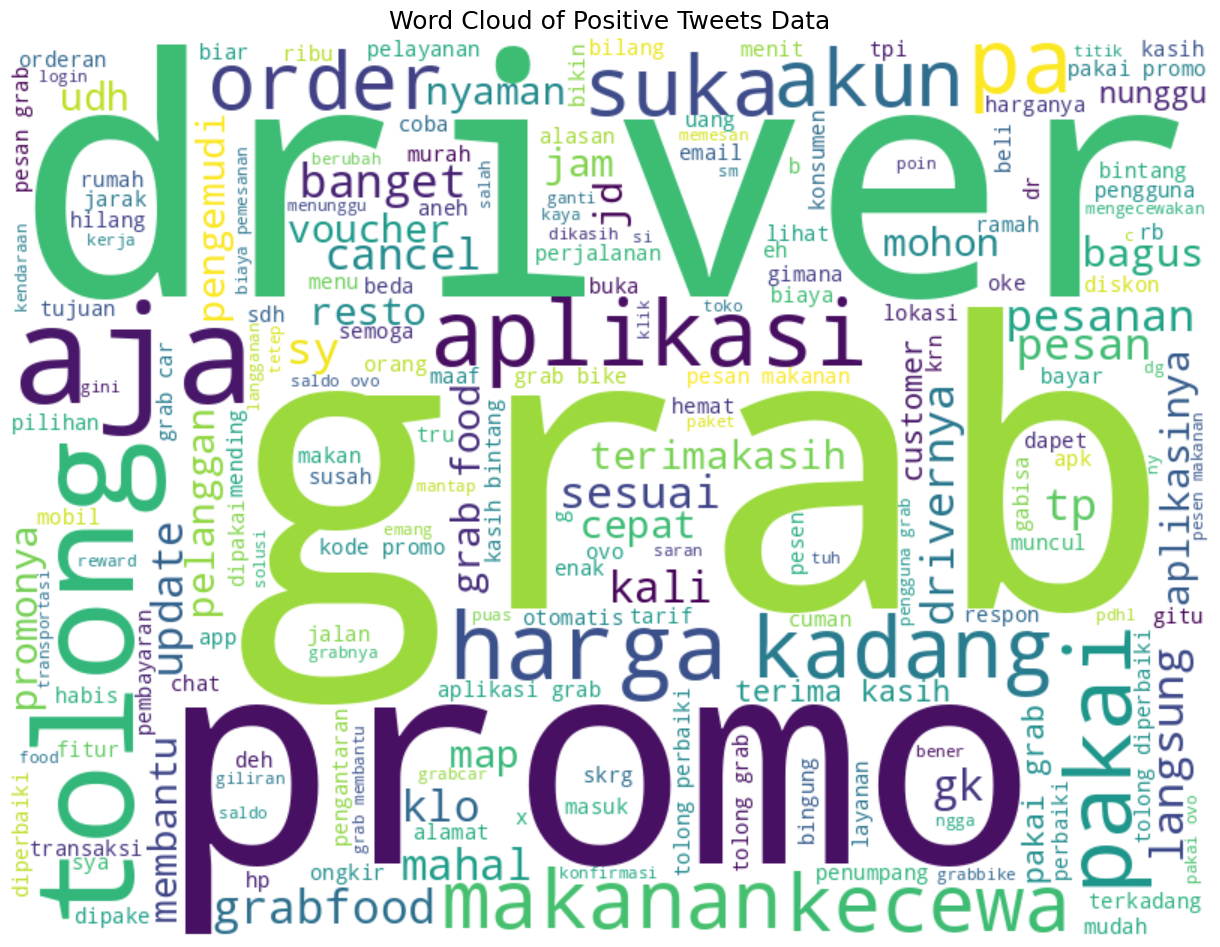

In [23]:

# Ambil hanya data positif dari clean_df
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Gabungkan semua kata dari kolom no_stopwords (list of tokens)
list_words = ' '.join([' '.join(tokens) for tokens in positive_tweets['no_stopwords'] if isinstance(tokens, list)])

# Membuat objek WordCloud
wordcloud = WordCloud(
    width=800,
    height=600,
    background_color='white',
    min_font_size=10
).generate(list_words)

# Menampilkan WordCloud
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)
ax.grid(False)
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis('off')
fig.tight_layout(pad=0)
plt.show()


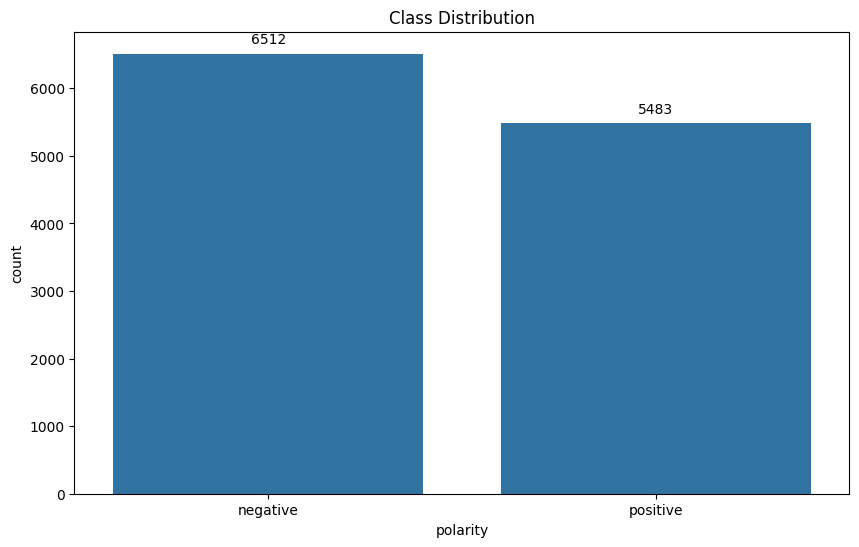

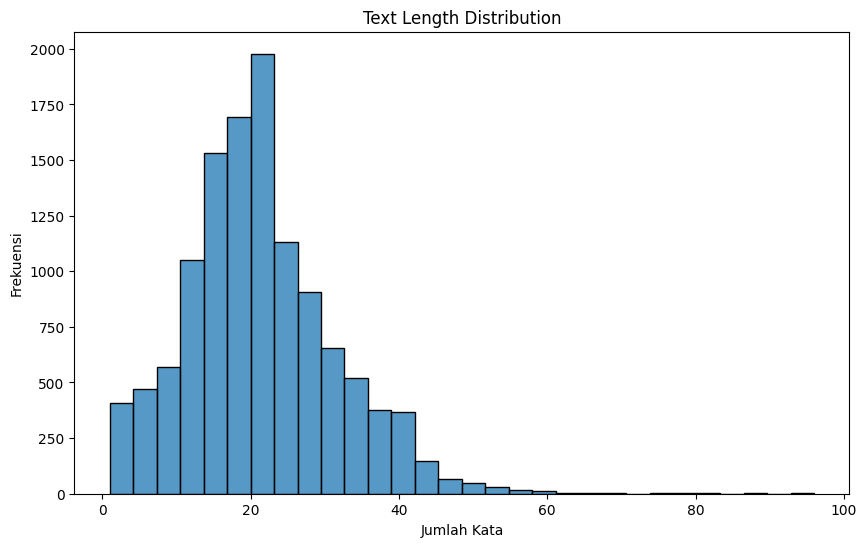

/tmp/ipython-input-740067887.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jumlah', y='index', data=tfidf_df, palette='viridis')


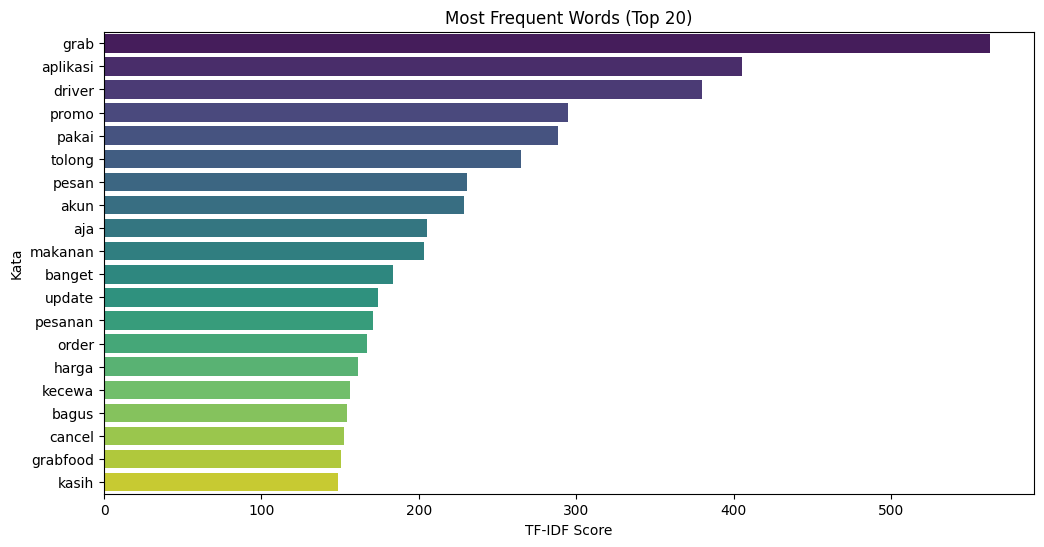

In [25]:
#Distribusi negatif dan positif
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df)
plt.title('Class Distribution')

# Menambahkan angka di atas bar
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')
plt.show()

#Distribusi jumlah karater dalam satu text
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['final_text'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'], bins=30)
plt.title('Text Length Distribution')
plt.xlabel('Jumlah Kata')
plt.ylabel('Frekuensi')
plt.show()



#distribusi kata yang paling sering digunakan
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['final_text'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)

sns.barplot(x='jumlah', y='index', data=tfidf_df, palette='viridis')
plt.title('Most Frequent Words (Top 20)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Kata')
plt.show()


# **Data Splitting**

In [26]:
clean_df.head(2)

,content,score,clean_text,lower_text,normalized_text,tokens,no_stopwords,final_text,polarity_score,polarity,text_length
0,"Sekarang aplikasi grab jelek banget sering eror, tiba2 keluar sendiri, trus dulu biasanya kalau pesan salah klik bisa dihapus ...ada jeda waktu buat pesan, ini gak bisa, harus, harus diperbaiki lagi ini",1,Sekarang aplikasi grab jelek banget sering eror tiba keluar sendiri trus dulu biasanya kalau pesan salah klik bisa dihapus ada jeda waktu buat pesan ini gak bisa harus harus diperbaiki lagi ini,sekarang aplikasi grab jelek banget sering eror tiba keluar sendiri trus dulu biasanya kalau pesan salah klik bisa dihapus ada jeda waktu buat pesan ini gak bisa harus harus diperbaiki lagi ini,sekarang aplikasi grab jelek banget sering eror tiba keluar sendiri trus dulu biasanya kalau pesan salah klik bisa dihapus ada jeda waktu buat pesan ini gak bisa harus harus diperbaiki lagi ini,"[sekarang, aplikasi, grab, jelek, banget, sering, eror, tiba, keluar, sendiri, trus, dulu, biasanya, kalau, pesan, salah, klik, bisa, dihapus, ada, jeda, waktu, buat, pesan, ini, gak, bisa, harus, harus, diperbaiki, lagi, ini]","[aplikasi, grab, jelek, banget, eror, trus, pesan, salah, klik, dihapus, jeda, pesan, diperbaiki]",aplikasi grab jelek banget eror trus pesan salah klik dihapus jeda pesan diperbaiki,-18,negative,13
1,"Saya sangat kecewa dengan aplikasinya, berapa kali saya coba ke lobby China arta gading saya di antar ke lobby paris. hal ini terjadi sudah berapa kali, tolong dong developernya perbaiki database aplikasinya. kasihan tukang grab dan customer juga",3,Saya sangat kecewa dengan aplikasinya berapa kali saya coba ke lobby China arta gading saya di antar ke lobby paris hal ini terjadi sudah berapa kali tolong dong developernya perbaiki database aplikasinya kasihan tukang grab dan customer juga,saya sangat kecewa dengan aplikasinya berapa kali saya coba ke lobby china arta gading saya di antar ke lobby paris hal ini terjadi sudah berapa kali tolong dong developernya perbaiki database aplikasinya kasihan tukang grab dan customer juga,saya sangat kecewa dengan aplikasinya berapa kali saya coba ke lobby china arta gading saya di antar ke lobby paris hal ini terjadi sudah berapa kali tolong dong developernya perbaiki database aplikasinya kasihan tukang grab dan customer juga,"[saya, sangat, kecewa, dengan, aplikasinya, berapa, kali, saya, coba, ke, lobby, china, arta, gading, saya, di, antar, ke, lobby, paris, hal, ini, terjadi, sudah, berapa, kali, tolong, dong, developernya, perbaiki, database, aplikasinya, kasihan, tukang, grab, dan, customer, juga]","[kecewa, aplikasinya, kali, coba, lobby, china, arta, gading, lobby, paris, kali, tolong, developernya, perbaiki, database, aplikasinya, kasihan, tukang, grab, customer]",kecewa aplikasinya kali coba lobby china arta gading lobby paris kali tolong developernya perbaiki database aplikasinya kasihan tukang grab customer,1,positive,20


In [27]:
# Memisahkan data menjadi fitur dan label
X = clean_df['final_text']
y = clean_df['polarity']

In [28]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(
    max_features= 3000,  # hanya mengambil 2500 fitur teratas
    min_df=3,         # kata harus muncul di ≥2 dokumen agar dipertimbangkan
    max_df=0.9       # kata yang muncul di >85% dokumen diabaikan (stopwords implicit)

)

X_tfidf = tfidf.fit_transform(X)


In [29]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,abang,abangnya,abu,ac,acara,acc,account,adain,adakan,adik,...,yaaaa,yah,yahh,yak,yaudah,yh,yng,youtube,zonk,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42
)

# **Pemodelan Machine Learning**

In [31]:
#Membuat objek Logistic Regression
log_reg = LogisticRegression(max_iter=500, solver='liblinear')  # solver 'liblinear' cocok untuk dataset kecil/menengah
log_reg.fit(X_train, y_train)
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = log_reg.predict(X_train)
y_pred_test_lr = log_reg.predict(X_test)

# Evaluasi akurasi
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

print(f"Akurasi Logistic Regression - Data Train: {accuracy_train_lr:.4f}")
print(f"Akurasi Logistic Regression - Data Test: {accuracy_test_lr:.4f}")


Akurasi Logistic Regression - Data Train: 0.9194
Akurasi Logistic Regression - Data Test: 0.8633


In [32]:
# membuat objek model Bernoulli Naive Bayes
naive_bayes = BernoulliNB()

# melatih model pada data train
naive_bayes.fit(X_train.toarray(), y_train)

# Prediksi Sentimen pada data train & test
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

# Evaluasi akurasi
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

print(f"Akurasi Naive Bayes - Data Train: {accuracy_train_nb}")
print(f"Akurasi Naive Bayes - Data Test: {accuracy_test_nb}")

Akurasi Naive Bayes - Data Train: 0.8186744476865361
Akurasi Naive Bayes - Data Test: 0.7615673197165486


# **Pemodelan Deep Learning**

In [33]:
#Encode Labeb
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(clean_df['polarity'])

In [34]:
#Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X.astype(str),
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

In [35]:
# Mengubah kata menjadi angka dan membuat kalimat sama panjang (Tokenizer dan Padding)

MAX_WORDS = 8000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post')

In [36]:
#Membuat model (Bidirectional LSTM)
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS, output_dim=128, input_length=MAX_LEN))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(
    X_train_pad, y_train,
    epochs=6,
    batch_size=64,
    validation_data=(X_test_pad, y_test)
)

# Evaluasi Akurasi
train_loss_bilstm, train_acc_bilstm = model.evaluate(X_train_pad, y_train, verbose=0)
test_loss_bilstm, test_acc_bilstm = model.evaluate(X_test_pad, y_test, verbose=0)

print(f"Akurasi Train BiLSTM: {train_acc_bilstm:.4f}")
print(f"Akurasi Test  BiLSTM: {test_acc_bilstm:.4f}")



Epoch 1/6


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


150/150 ━━━━━━━━━━━━━━━━━━━━ 45s 267ms/step - accuracy: 0.6258 - loss: 0.6319 - val_accuracy: 0.8404 - val_loss: 0.3776
Epoch 2/6
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 266ms/step - accuracy: 0.9038 - loss: 0.2562 - val_accuracy: 0.8724 - val_loss: 0.3026
Epoch 3/6
150/150 ━━━━━━━━━━━━━━━━━━━━ 40s 257ms/step - accuracy: 0.9600 - loss: 0.1150 - val_accuracy: 0.8749 - val_loss: 0.3153
Epoch 4/6
150/150 ━━━━━━━━━━━━━━━━━━━━ 42s 281ms/step - accuracy: 0.9783 - loss: 0.0673 - val_accuracy: 0.8658 - val_loss: 0.4183
Epoch 5/6
150/150 ━━━━━━━━━━━━━━━━━━━━ 39s 258ms/step - accuracy: 0.9887 - loss: 0.0422 - val_accuracy: 0.8808 - val_loss: 0.3998
Epoch 6/6
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 258ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.8708 - val_loss: 0.4456
Akurasi Train BiLSTM: 0.9935
Akurasi Test  BiLSTM: 0.8708


In [37]:
# Membuat DataFrame hasil akurasi 3 model
results_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'BiLSTM'],
    'Accuracy Train': [accuracy_train_nb, accuracy_train_lr, train_acc_bilstm],
    'Accuracy Test': [accuracy_test_nb, accuracy_test_lr, test_acc_bilstm]
})

# Menampilkan hanya kolom Model & Accuracy Test
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)


                 Model  Accuracy Test
0          Naive Bayes       0.761567
1  Logistic Regression       0.863276
2               BiLSTM       0.870780


In [38]:
# Mengurutkan DataFrame berdasarkan kolom "Accuracy Test" dari tertinggi ke terendah
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)

# Menampilkan DataFrame yang telah diurutkan
print(accuracy_test_sorted)


                 Model  Accuracy Test
2               BiLSTM       0.870780
1  Logistic Regression       0.863276
0          Naive Bayes       0.761567


In [43]:
#Memasukkan kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

#Melakukan preprocessing terhadap kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Tokenizer + Padding
seq = tokenizer.texts_to_sequences([kalimat_baru_final])
pad = pad_sequences(seq, maxlen=MAX_LEN, padding='post')

# Prediksi dengan BiLSTM
pred = model.predict(pad)

# Prediksi probabilitas
pred_prob = model.predict(pad)[0][0]

# menentukan label_pred (0 = negatif, 1 = positif)
label_pred = 1 if pred_prob >= 0.5 else 0

# Kembalikan ke bentuk label asli
hasil_label = label_encoder.inverse_transform([label_pred])[0]

print(f"Sentimen kalimat baru adalah: {hasil_label.upper()} (Prob: {pred_prob:.2f})")



Masukkan kalimat baru: grab
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Sentimen kalimat baru adalah: POSITIVE (Prob: 0.78)
